In [1]:

import warnings
warnings.filterwarnings("ignore")

In [2]:
from environments.live_environments import BaseLiveTradingEnv
from neuralforecast.core import NeuralForecast
from configs import defaults
from Keys import *
import pickle
import numpy as np
from utils import pearl_utils,utils,discord_utils
from Pearl.pearl.utils.instantiations.environments.gym_environment import \
    GymEnvironment
import boto3
from discord import SyncWebhook
from utils import discord_utils
import requests
import matplotlib.pyplot as plt
import pandas as pd
from utils.pandas_reward_functions import log_reward_function,diff_reward_function

need to install oandapyV20
need to install alpaca


In [8]:

conn = boto3.resource('s3')
AWS_ACCESS_KEY
AWS_SECRET_KEY
s3= boto3.client('s3', aws_access_key_id=AWS_ACCESS_KEY, aws_secret_access_key=AWS_SECRET_KEY)
s3.download_file('coinbasetradehistory','trade.db','Trade_history/trade.db')
# conn.download_file(
#     # Filename='https://coinbasetradehistory.s3.us-east-1.amazonaws.com/trade.db'
# )


In [9]:
channel_url='https://discord.com/api/webhooks/986694946381783102/FOA7nG9ShDcXY95-c3XEKV-Fdek66L9xfbQoKuEuFQkK2P4aFWaZ_fKmzw00j8Oj8Woj'
message='Testing'

In [10]:
forecast_model=NeuralForecast.load(defaults.forecasting_model_path)
# forecast_model=NeuralForecast.load('MultiHeadForecastingModel/')

Seed set to 20
Seed set to 17
Seed set to 17


In [11]:
forecast_model.scalers_

{'y': <coreforecast.scalers.LocalRobustScaler at 0x11824bfa0>,
 'feature_hour_of_day': <coreforecast.scalers.LocalRobustScaler at 0x33a504880>,
 'feature_day_of_week': <coreforecast.scalers.LocalRobustScaler at 0x33a5042e0>,
 'feature_day_of_month': <coreforecast.scalers.LocalRobustScaler at 0x33a5045b0>,
 'feature_day_of_year': <coreforecast.scalers.LocalRobustScaler at 0x33a5044c0>,
 'feature_BBANDS_BB_UPPER': <coreforecast.scalers.LocalRobustScaler at 0x33a504610>,
 'feature_BBANDS_BB_MIDDLE': <coreforecast.scalers.LocalRobustScaler at 0x33a504700>,
 'feature_BBANDS_BB_LOWER': <coreforecast.scalers.LocalRobustScaler at 0x33a5048e0>,
 'feature_MACD_MACD': <coreforecast.scalers.LocalRobustScaler at 0x33a504a00>,
 'feature_MACD_SIGNAL': <coreforecast.scalers.LocalRobustScaler at 0x33a505720>,
 'feature_14_period_RSI': <coreforecast.scalers.LocalRobustScaler at 0x33a505900>,
 'feature_14_period_STOCH_%K': <coreforecast.scalers.LocalRobustScaler at 0x33a505630>}

In [12]:
base_asset='DOGE'
quote_asset='USDC'
test_net=False
time_frame='1h'
product_type='FUTURE'
product_type='Spot'
futures_target='DOG-29NOV24-CDE'
exchange='coinbase'
trade_target='/'.join([base_asset,quote_asset]) if product_type.upper()=='SPOT' else  futures_target
trade_target

'DOGE/USDC'

In [13]:
live_env=BaseLiveTradingEnv(
            api_key=coinbase_api_key,
            api_secret=coinbase_api_secret,
            paper=test_net,
            symbol=trade_target,
            time_frame=time_frame,
            product_type=product_type,
            positions=[0,1],
            history_path='Trade_history/trade.db',
            exchange=exchange,
            forecast_model=forecast_model,
            reward_function=diff_reward_function,
            
            discord_webhook='https://discord.com/api/webhooks/986694946381783102/FOA7nG9ShDcXY95-c3XEKV-Fdek66L9xfbQoKuEuFQkK2P4aFWaZ_fKmzw00j8Oj8Woj'

            )

Paper TradingFalse on coinbase at api.coinbase.com
 got symbol DOGE/USDC
final symbol DOGE-USDC
Connected to coinbase client
Getting data


100%|██████████| 78/78 [00:00<00:00, 12396.49it/s]
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

In [14]:
history=live_env.load_history()

In [15]:
live_env.client.get_current_position()

1.4510397797427255e-05

Getting data


100%|██████████| 78/78 [00:00<00:00, 17180.74it/s]
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

0
Getting data


100%|██████████| 78/78 [00:00<00:00, 15430.42it/s]
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

{'New_position': 0, 'Trade_from': 1.4537412225052102e-05, 'Trade_to': 0, 'Change_size': -1.4537412225052102e-05, 'Change_direction': -1, 'Place_order': 'SELL', 'Change needed to get to target': 1.4537412225052102e-05, 'Size in dollars': 0.006650039915170748, 'Size in asset': 0.0174052920019126}
Sell
{'success': False, 'response': {'error': 'UNKNOWN_FAILURE_REASON', 'message': '', 'error_details': '', 'preview_failure_reason': 'PREVIEW_INVALID_BASE_SIZE_TOO_SMALL'}, 'order_configuration': {'market_market_ioc': {'base_size': '0.01', 'rfq_enabled': False, 'rfq_disabled': False}}}
ok...returning now....
fixed order: {'success': False, 'error': 'UNKNOWN_FAILURE_REASON', 'message': '', 'error_details': '', 'preview_failure_reason': 'PREVIEW_INVALID_BASE_SIZE_TOO_SMALL', 'fill_type': 'market_market_ioc', 'base_size': '0.01', 'rfq_enabled': False, 'rfq_disabled': False}
Getting data


100%|██████████| 78/78 [00:00<00:00, 16901.16it/s]
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

,ds,close,symbol,AutoTFT,AutoBiTCN,AutoNBEATS,mean_pred,cutoff
146,2024-11-17 17:00:00,0.36717,DOGE-USDC,NaN,NaN,NaN,NaN,NaT
147,2024-11-17 18:00:00,0.35914,DOGE-USDC,NaN,NaN,NaN,NaN,NaT
148,2024-11-17 19:00:00,0.35928,DOGE-USDC,NaN,NaN,NaN,NaN,NaT
149,2024-11-17 20:00:00,0.36106,DOGE-USDC,NaN,NaN,NaN,NaN,NaT
150,2024-11-17 21:00:00,0.35574,DOGE-USDC,NaN,NaN,NaN,NaN,NaT
151,2024-11-17 22:00:00,0.36076,DOGE-USDC,NaN,NaN,NaN,NaN,NaT
152,2024-11-17 23:00:00,0.36706,DOGE-USDC,NaN,NaN,NaN,NaN,NaT
153,2024-11-18 00:00:00,0.36220,DOGE-USDC,NaN,NaN,NaN,NaN,NaT
154,2024-11-18 01:00:00,0.36915,DOGE-USDC,NaN,NaN,NaN,NaN,NaT
155,2024-11-18 02:00:00,0.37197,DOGE-USDC,NaN,NaN,NaN,NaN,NaT


,New_position,Trade_from,Trade_to,Change_size,Change_direction,Place_order,Change needed to get to target,Size in dollars,Size in asset,success,...,data_symbol,position,time_frame,exchange,product_type,portfolio_distribution_asset,portfolio_distribution_fiat,portfolio_valuation,idx,real_position
0,0,0.000015,0,-0.000015,-1,SELL,0.000015,0.00665,0.017405,False,...,DOGE-USDC,0.000015,1h,coinbase,SPOT,0.017405,457.436519,457.443164,0,0.000015


(array([ 0.16959691,  0.17017233,  0.1670747 ,  0.15290646,  0.14227729,
         0.13973564,  0.12503907,  0.12605458,  0.12526935,  0.12518784,
         0.12459852,  0.1239845 ,  0.16419701,  0.16313682,  0.16289172,
         0.16258283,  0.16216427,  0.16108267,  0.15294433,  0.15312123,
         0.15174527,  0.14689237,  0.14301336,  0.14160094,  0.19813228,
        -0.14466801,  0.0434004 ,  0.16706182,  0.43400404,  0.43400404],
       dtype=float32),
 -2.0886350853288604e-06,
 False,
 False,
 {'New_position': 0,
  'Trade_from': 1.4537412225052102e-05,
  'Trade_to': 0,
  'Change_size': -1.4537412225052102e-05,
  'Change_direction': -1,
  'Place_order': 'SELL',
  'Change needed to get to target': 1.4537412225052102e-05,
  'Size in dollars': 0.006650039915170748,
  'Size in asset': 0.0174052920019126,
  'success': False,
  'error': 'UNKNOWN_FAILURE_REASON',
  'message': '',
  'error_details': '',
  'preview_failure_reason': 'PREVIEW_INVALID_BASE_SIZE_TOO_SMALL',
  'fill_type': 'mar

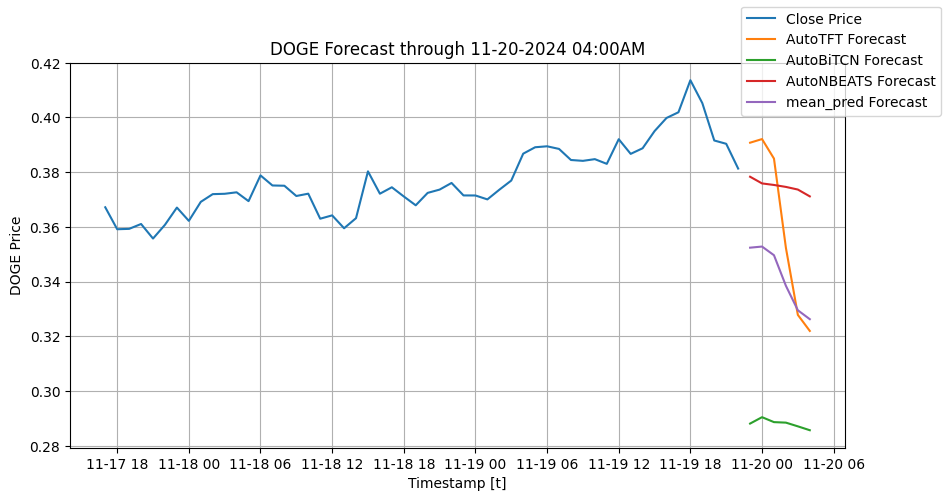

In [16]:
live_env.reset()
live_env.step(0)

In [17]:
plot_df=live_env.prepare_plot_df()
plot_df.reset_index(drop=True,inplace=True)

In [18]:
plot_df

,ds,close,symbol,AutoTFT,AutoBiTCN,AutoNBEATS,mean_pred,cutoff
0,2024-11-17 17:00:00,0.36717,DOGE-USDC,NaN,NaN,NaN,NaN,NaT
1,2024-11-17 18:00:00,0.35914,DOGE-USDC,NaN,NaN,NaN,NaN,NaT
2,2024-11-17 19:00:00,0.35928,DOGE-USDC,NaN,NaN,NaN,NaN,NaT
3,2024-11-17 20:00:00,0.36106,DOGE-USDC,NaN,NaN,NaN,NaN,NaT
4,2024-11-17 21:00:00,0.35574,DOGE-USDC,NaN,NaN,NaN,NaN,NaT
5,2024-11-17 22:00:00,0.36076,DOGE-USDC,NaN,NaN,NaN,NaN,NaT
6,2024-11-17 23:00:00,0.36706,DOGE-USDC,NaN,NaN,NaN,NaN,NaT
7,2024-11-18 00:00:00,0.36220,DOGE-USDC,NaN,NaN,NaN,NaN,NaT
8,2024-11-18 01:00:00,0.36915,DOGE-USDC,NaN,NaN,NaN,NaN,NaT
9,2024-11-18 02:00:00,0.37197,DOGE-USDC,NaN,NaN,NaN,NaN,NaT


In [19]:
plot_df.dtypes

ds            datetime64[ns]
close                float64
symbol                object
AutoTFT              float32
AutoBiTCN            float32
AutoNBEATS           float32
mean_pred            float32
cutoff        datetime64[ns]
dtype: object

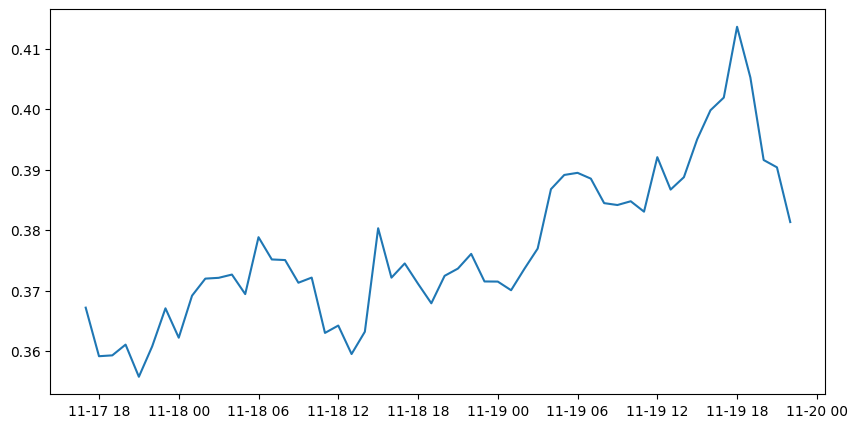

In [20]:
fig,axes=plt.subplots(sharex=True, sharey=True, figsize=(10, 5))
time=pd.Timestamp(plot_df['ds'].values[-1]).strftime('%m-%d-%Y %I:%M%p')

axes.plot(plot_df['ds'], plot_df['close'], label='Close Price')
# plot_df['ds'].values[-1]

In [21]:
live_env.raw_df

,date_close,low,high,open,close,volume,symbol,ds
199,2024-11-11 15:00:00,0.28934,0.31363,0.29145,0.31059,232657785.4,DOGE-USDC,2024-11-11 15:00:00
198,2024-11-11 16:00:00,0.30964,0.32899,0.31044,0.32449,225275659,DOGE-USDC,2024-11-11 16:00:00
197,2024-11-11 17:00:00,0.32014,0.32923,0.32436,0.32178,128116323.9,DOGE-USDC,2024-11-11 17:00:00
196,2024-11-11 18:00:00,0.31244,0.32518,0.32174,0.32468,131129970.2,DOGE-USDC,2024-11-11 18:00:00
195,2024-11-11 19:00:00,0.31662,0.32791,0.32473,0.31848,106359183.9,DOGE-USDC,2024-11-11 19:00:00
...,...,...,...,...,...,...,...,...
4,2024-11-19 18:00:00,0.39993,0.4204,0.4019,0.41361,154327314.2,DOGE-USDC,2024-11-19 18:00:00
3,2024-11-19 19:00:00,0.40407,0.41538,0.4135,0.40523,80753381.4,DOGE-USDC,2024-11-19 19:00:00
2,2024-11-19 20:00:00,0.38633,0.40767,0.40539,0.39158,102582410,DOGE-USDC,2024-11-19 20:00:00
1,2024-11-19 21:00:00,0.38378,0.39391,0.39158,0.39037,87910385.3,DOGE-USDC,2024-11-19 21:00:00


In [22]:
model_name=defaults.model_name
agent_path=f'Agent/pearl_{model_name}_model.pkl'
agent,learning_params=pearl_utils.load_agent_from_study(study_path="sqlite:///pearl_hyper_parameters.sqlite3",
                                        study_name=f'pearl-{model_name}-hp-search',
                                        action_space_dim=2,
                                            observation_space_dim=30,)
agent=pearl_utils.load_agent_weights(agent,weight_path=agent_path)

[I 2024-11-19 14:31:41,304] Using an existing study with name 'pearl-DOGEUSDTSPOT-hp-search' instead of creating a new one.


IndexError: list index out of range

In [ ]:
from Pearl.pearl.utils.instantiations.environments.gym_environment import \
    GymEnvironment

In [ ]:
live_pearl_env=GymEnvironment(live_env)

In [ ]:
observation,action_space=live_pearl_env.reset()

In [ ]:
agent.observe(observation, action_space)

In [ ]:
action=agent.act(exploit=True)

# action=
action

In [ ]:
live_env.client.account()

In [ ]:
action_result=live_pearl_env.step(int(action))


In [ ]:
len(live_env.client.trade_client.get_fills()['fills'])

In [ ]:
action_result.observation

In [ ]:
df=live_env.df
import pandas as pd

In [ ]:
df['ds_pst']=pd.to_datetime(df['ds'],utc=False)
df[['ds','ds_pst']]

In [ ]:
live_env.client.get_trade_rules()